## 0. Read File and Split

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

cleanedFile = "4.10.24 Duplicates Removed.csv"
DF = pd.read_csv(cleanedFile)

DF.dropna(axis='index', how='any', inplace=True)

train_set, test_set = train_test_split(DF, test_size=0.1, random_state=0)
print(DF.keys)

X = DF[['latitude', 'longitude', 'floorSize']]
y = DF['price']

X_train = train_set[['latitude', 'longitude', 'floorSize']]
y_train = train_set['price']

X_test = test_set[['latitude', 'longitude', 'floorSize']]
y_test = test_set['price']

<bound method NDFrame.keys of       latitude  longitude  floorSize   price  \
0    39.252922 -94.571526       1656  330000   
1    39.286930 -94.595634       1649  376700   
2    39.052692 -94.545950       1600  185000   
3    39.211430 -94.638050       1698  319000   
4    39.293766 -94.464226       1649  373600   
..         ...        ...        ...     ...   
401  39.142340 -94.649720       1366  295000   
402  39.147373 -94.832670       2565  590159   
403  39.112940 -94.631050       1512  195000   
404  39.136390 -94.644430       1570  145000   
405  39.148520 -94.832760       2257  574635   

                                                   url  
0    https://www.zillow.com/homedetails/701-NE-88th...  
1    https://www.zillow.com/community/holly-farms/3...  
2    https://www.zillow.com/homedetails/4014-Colleg...  
3    https://www.zillow.com/homedetails/6407-N-Kirk...  
4    https://www.zillow.com/community/somerbrook/34...  
..                                                 

## 1. Clustering

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import silhouette_score

X_train_cluster = train_set[['latitude', 'longitude', 'floorSize']]
y_train_cluster = train_set['price']

X_test_cluster = test_set[['latitude', 'longitude', 'floorSize']]
y_test_cluster = test_set['price']

KMC = KMeans(n_clusters=2)


KMC.fit(X_train_cluster)
y_train_predict_cluster = KMC.predict(X_train_cluster)
matrixTrain_cluster = confusion_matrix(y_train_cluster, y_train_predict_cluster)
print(matrixTrain_cluster)
print("Accuracy", accuracy_score(y_train_cluster, y_train_predict_cluster))
print("F1", f1_score(y_train_cluster ,y_train_predict_cluster, average='weighted'))

y_test_predict_cluster = KMC.predict(X_test_cluster)
matrixTest = confusion_matrix(y_test_cluster, y_test_predict_cluster)
print(matrixTest)
silhouette_avg_cluster = silhouette_score(X_train_cluster, y_train_predict_cluster)
print(f"Silhouette Score for training data: {silhouette_avg_cluster}")

silhouette_avg_test_cluster = silhouette_score(X_test_cluster, y_test_predict_cluster)
print(f"Silhouette Score for test data: {silhouette_avg_test_cluster}")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Silhouette Score for training data: 0.604633121016983
Silhouette Score for test data: 0.6273004099022845


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import silhouette_score

X_cluster = DF[['latitude', 'longitude', 'floorSize']]
y_cluster = DF['price']

spliter_cluster = StratifiedKFold(n_splits = 5, shuffle=True, random_state= 23)

for train_indices, validate_indices in spliter_cluster.split(X_cluster, y_cluster):
    KMC = KMeans(n_clusters=2, random_state=3)
    X_train_iloc_cluster = X_cluster.iloc[train_indices]
    y_train_ioc = y.iloc[train_indices]
    KMC.fit(X_train_iloc_cluster)
    X_validate_cluster = X.iloc[validate_indices]
    y_validate_cluster = y.iloc[validate_indices]
    y_predicted_cluster = KMC.predict(X_validate_cluster)
    matrix_cluster = confusion_matrix(y_validate_cluster, y_predicted_cluster)
    print(matrix_cluster)
    print(f"Silhouette Score for training data: {silhouette_avg_test_cluster}")

    silhouette_avg_test_cluster = silhouette_score(X_validate_cluster, y_predicted_cluster)
    print(f"Silhouette Score for test data: {silhouette_avg_test_cluster}")
    print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Silhouette Score for training data: 0.6273004099022845
Silhouette Score for test data: 0.5733827793087907

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Silhouette Score for training data: 0.5733827793087907
Silhouette Score for test data: 0.5839513832264526

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Silhouette Score for training data: 0.5839513832264526
Silhouette Score for test data: 0.6443146663234947

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Silhouette Score for training data: 0.6443146663234947
Silhouette Score for test data: 0.635508969017055

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 

c:\Users\CamSu\Desktop\pyVENV\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


## 2. Dimensional Analysis

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

X_train_DA = train_set[['latitude', 'longitude', 'floorSize']]
y_train_DA = train_set['price']

X_test_DA = test_set[['latitude', 'longitude', 'floorSize']]
y_test_DA = test_set['price']

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_DA)
X_test_standardized = scaler.transform(X_test_DA)

pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

KMC = KMeans(n_clusters=2)


KMC.fit(X_train_pca)
y_train_predict_pca = KMC.predict(X_train_pca)

y_test_predict_pca = KMC.predict(X_test_pca)
matrixTrain_DA = confusion_matrix(y_train_DA, y_train_predict_pca)
print(matrixTrain_DA)
print( accuracy_score(y_train_DA, y_train_predict_pca))
print(f1_score(y_train_DA, y_train_predict_pca, average='weighted'))

matrixTest_DA = confusion_matrix(y_test_DA, y_test_predict_pca)
print(matrixTest)
print(accuracy_score(y_test_DA, y_test_predict_pca))
print(f1_score(y_test_DA, y_test_predict_pca, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
0.0
0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
0.0
0.0


## 3. Visualize and Narrative

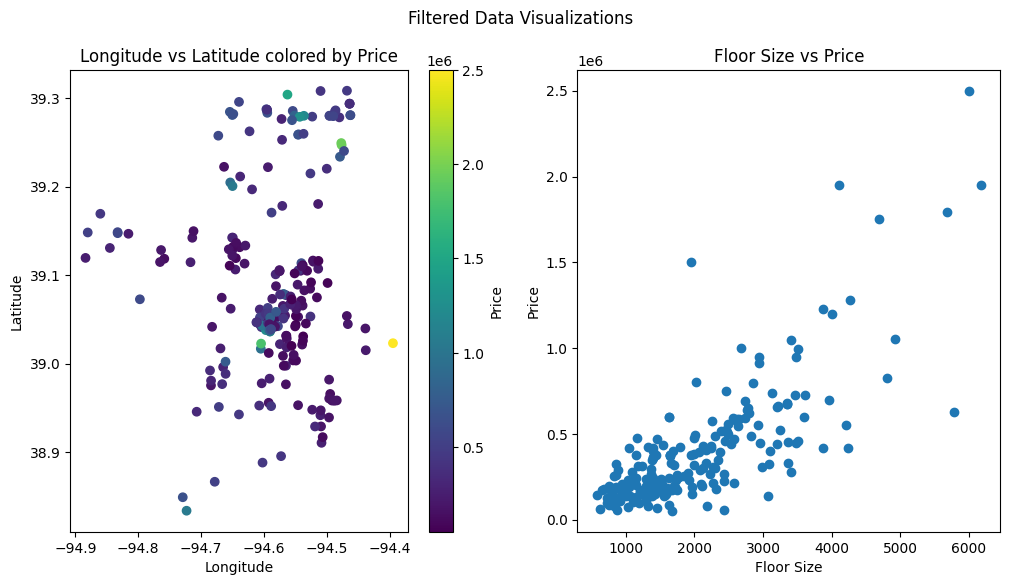

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming DF is your DataFrame and it contains columns 'latitude', 'longitude', 'floorSize', and 'price'
max_floor_size_index = DF['floorSize'].idxmax()
max_price_index = DF['price'].idxmax()

# First, create a copy of the original DataFrame to modify
df_modified = DF.copy()

# Drop the maximum floor size and price rows from df_modified
df_modified = df_modified.drop(index=max_floor_size_index)
df_modified = df_modified.drop(index=max_price_index)

# Filter df_modified based on the specified range of longitude and latitude
mask = (df_modified['longitude'] >= -95) & (df_modified['longitude'] <= -94) & (df_modified['latitude'] >= 38.5) & (df_modified['latitude'] <= 39.5)
X_filtered = df_modified[mask][['latitude', 'longitude', 'floorSize']]
y_filtered = df_modified[mask]['price']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of longitude vs. latitude colored by price
scatter = axs[0].scatter(X_filtered['longitude'], X_filtered['latitude'], c=y_filtered, cmap='viridis')
axs[0].set_title('Longitude vs Latitude colored by Price')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
plt.colorbar(scatter, ax=axs[0], label='Price')

# Scatter plot of floorSize vs. price
axs[1].scatter(X_filtered['floorSize'], y_filtered)
axs[1].set_title('Floor Size vs Price')
axs[1].set_xlabel('Floor Size')
axs[1].set_ylabel('Price')

# Show the plots
plt.suptitle('Filtered Data Visualizations')
plt.show()


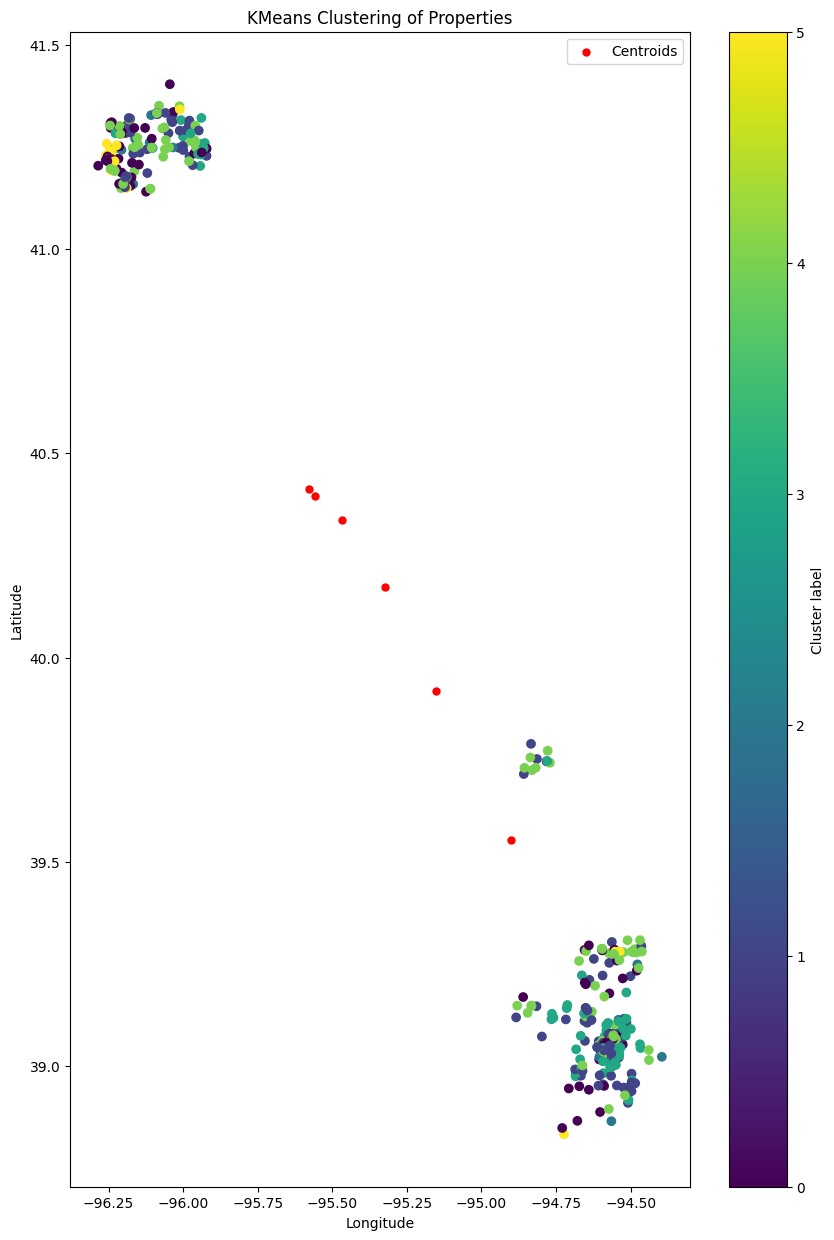

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame `df` with columns: 'longitude', 'latitude', 'floorSize', and 'price'
DF['AbsolutePosition'] = DF['longitude'] * DF['latitude']
df = pd.DataFrame({
    'longitude': DF['longitude'],
    'latitude': DF['latitude'],
    'floorSize': DF['floorSize'],
    'price': DF['price']
})

# Extract the features (X) from the DataFrame
X = df[['longitude', 'latitude', 'floorSize']]

# Common parameters for KMeans clustering
common_params = {
    'n_init': 'auto',  # Number of initializations for KMeans
    'random_state': 10  # Seed for reproducibility
}

# Choose the number of clusters (e.g., 3) - Adjust based on your data and objectives
n_clusters = 6

# Check if number of samples is >= n_clusters
n_samples = X.shape[0]
if n_samples < n_clusters:
    raise ValueError(f"Number of data samples ({n_samples}) should be >= n_clusters ({n_clusters})")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, **common_params)
y_pred = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 15))

# Scatter plot of the clusters (using longitude and latitude for x and y axes)
plt.scatter(X['longitude'], X['latitude'], c=y_pred, cmap='viridis')
plt.colorbar(label='Cluster label')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering of Properties')

# Optional: Add cluster centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='.', label='Centroids')

plt.legend()
plt.show()


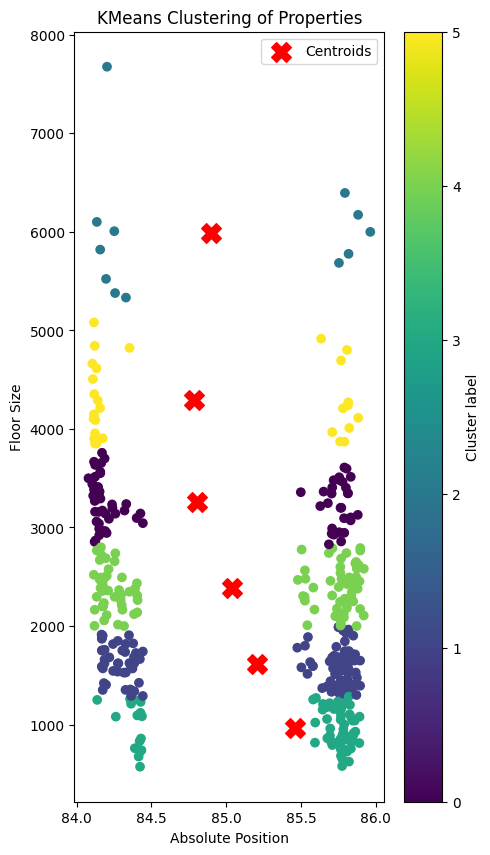

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame `DF` with columns: 'longitude', 'latitude', 'floorSize', and 'price'
# Calculate the AbsolutePosition column
DF['AbsolutePosition'] = (DF['longitude'] + 180) + (DF['latitude'] + 90) / 360

# Create a new DataFrame with the desired columns
df = pd.DataFrame({
    'absolute': DF['AbsolutePosition'],
    'floorSize': DF['floorSize'],
    'price': DF['price']
})

# Extract the features (X) from the DataFrame
X = df[['absolute', 'floorSize']]

# Common parameters for KMeans clustering
common_params = {
    'n_init': 'auto',  # Number of initializations for KMeans
    'random_state': 10  # Seed for reproducibility
}

# Choose the number of clusters (e.g., 3) - Adjust based on your data and objectives
n_clusters = 6

# Check if number of samples is >= n_clusters
n_samples = X.shape[0]
if n_samples < n_clusters:
    raise ValueError(f"Number of data samples ({n_samples}) should be >= n_clusters ({n_clusters})")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, **common_params)
y_pred = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(5, 10))

# Scatter plot of the clusters using 'absolute' and 'floorSize' features for x and y axes
plt.scatter(X['absolute'], X['floorSize'], c=y_pred, cmap='viridis')
plt.colorbar(label='Cluster label')
plt.xlabel('Absolute Position')
plt.ylabel('Floor Size')
plt.title('KMeans Clustering of Properties')

# Optional: Add cluster centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.legend()
plt.show()


#### Narrative
For this project I aimed to predict house prices using features one would think have a large correlation to the price of a house. The features that I ended up with were; longitude, latitude, and floor size. It may have been possible to use other features with another dataset but due to the limitations that I had to work with in my data, from scaping Zillow that is what I used. Despite experimenting with various models, I found that these features alone were not very predictive of house prices. K_means clustering appeared to be the best model for predicting the price, I believe this to be because houses with similar prices will cluster in an area making it more likely a neighbor of a high priced home will also most likely be high price. Predicting the price of real estate likely requires more comprehensive data, such as property value, property condition, acreage of the property, date of construction, and prices of other houses in the neighborhood.

## 4. Anomalous Data

There does not appear to be anomolous data, there are two massiver outliers within the data that both have enormouse price and floorSize compared to the rest of the data but this is most likely to the amount of land being sold alongside the house and or a mansion being sold

## 5. Random Forest & Neural Net

#### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

X_train_RF = train_set[['latitude', 'longitude', 'floorSize']]
y_train_RF = train_set['price']

X_test_RF = test_set[['latitude', 'longitude', 'floorSize']]
y_test_RF = test_set['price']

RFC = RandomForestClassifier(max_depth=7)


RFC.fit(X_train_RF, y_train_RF)
y_train_predict_rf = RFC.predict(X_train_RF)
matrixTrain_RF = confusion_matrix(y_train_RF, y_train_predict_rf)
print(matrixTrain_RF)
print("Accuracy", accuracy_score(y_train_RF, y_train_predict_rf))
print("F1", f1_score(y_train_RF ,y_train_predict_rf, average='weighted'))

y_test_predict_rf = RFC.predict(X_test_RF)
matrixTest_RF = confusion_matrix(y_test_RF, y_test_predict_rf)
print(matrixTest_RF)
print("Accuracy", accuracy_score(y_test_RF, y_test_predict_rf))
print("F1", f1_score(y_test_RF, y_test_predict_rf, average='weighted'))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Accuracy 0.9178082191780822
F1 0.8989808061040938
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.04878048780487805
F1 0.028455284552845524


In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X_RF = DF[['latitude', 'longitude', 'floorSize']]
y_RF = DF['price']

spliter = StratifiedKFold(n_splits = 2)

for train_indices, validate_indices in spliter.split(X, y):
    RFC = RandomForestClassifier(max_depth=8)
    X_train_iloc_RF = X_RF.iloc[train_indices]
    y_train_RF = y_RF.iloc[train_indices]
    RFC.fit(X_train_iloc_RF,y_train_RF)
    X_validate_RF = X_RF.iloc[validate_indices]
    y_validate_RF = y_RF.iloc[validate_indices]
    y_predicted_RF = RFC.predict(X_validate_RF)
    matrix_RF = confusion_matrix(y_validate_RF, y_predicted_RF)
    print(matrix_RF)
    print("Accuracy", accuracy_score(y_validate_RF,y_predicted_RF))
    print("F1", f1_score(y_validate_RF, y_predicted_RF, average='weighted'))
    print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.034482758620689655
F1 0.025803424818203143



c:\Users\CamSu\Desktop\pyVENV\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.03940886699507389
F1 0.02857142857142857



#### Neural Net

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


X_train_MLP = train_set[['latitude', 'longitude', 'floorSize']]
y_train_MLP = train_set['price']

X_test_MLP = test_set[['latitude', 'longitude', 'floorSize']]
y_test_MLP = test_set['price']

MLP = MLPClassifier()


MLP.fit(X_train_MLP, y_train_MLP)
y_train_predict_MLP = MLP.predict(X_train_MLP)
matrixTrain_MLP = confusion_matrix(y_train_MLP, y_train_predict_MLP)
print(matrixTrain_MLP)
print("Accuracy", accuracy_score(y_train_MLP, y_train_predict_MLP))
print("F1", f1_score(y_train_MLP ,y_train_predict_MLP, average='weighted'))

y_test_predict_MLP = MLP.predict(X_test_MLP)
matrixTest_MLP = confusion_matrix(y_test_MLP, y_test_predict_MLP)
print(matrixTest_MLP)
print("Accuracy", accuracy_score(y_test, y_test_predict_MLP))
print("F1", f1_score(y_test_MLP, y_test_predict_MLP, average='weighted'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.024657534246575342
F1 0.0032680467570282935
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0


In [11]:
from sklearn.model_selection import StratifiedKFold

X_MLP = DF[['latitude', 'longitude', 'floorSize']]
y_MLP = DF['price']

spliter = StratifiedKFold(n_splits = 5)

for train_indices, validate_indices in spliter.split(X, y):
    MLP = MLPClassifier()
    X_train_MLP = X_MLP.iloc[train_indices]
    y_train_MLP = y_MLP.iloc[train_indices]
    MLP.fit(X_train_MLP, y_train_MLP)
    X_validate_MLP = X_MLP.iloc[validate_indices]
    y_validate_MLP = y_MLP.iloc[validate_indices]
    y_predicted_MLP = MLP.predict(X_validate_MLP)
    matrix_MLP = confusion_matrix(y_validate_MLP, y_predicted_MLP)
    print(matrix_MLP)
    print("Accuracy", accuracy_score(y_validate_MLP,y_predicted_MLP))
    print("F1", f1_score(y_validate_MLP, y_predicted_MLP, average='weighted'))
    print()

c:\Users\CamSu\Desktop\pyVENV\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012195121951219513
F1 0.0008410428931875525

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.024691358024691357
F1 0.0026781631719903325

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.0
F1 0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.012345679012345678
F1 0.0007482229704451927

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Accuracy 0.024691358024691357
F1 0.0022914328469884025

